In [31]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Embedding, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sadan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sadan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
df_fake = pd.read_csv('fake[1].csv')
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [33]:
df_real = pd.read_csv('true[1].csv')
df_real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [34]:
df_fake['label'] = 'Fake'
df_real['label'] = 'Real'
df = pd.concat([df_fake,df_real])
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [35]:
print(f'Data rows: {df.shape[0]}, Data columns: {df.shape[1]}')

Data rows: 44898, Data columns: 5


In [36]:
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [37]:
df.duplicated().sum()

209

In [38]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
print(f'Data rows after cleaning: {df.shape[0]}, Data columns after cleaning: {df.shape[1]}')

Data rows after cleaning: 44689, Data columns after cleaning: 5


In [39]:

def clean_text(text):
    # Converting all text to lowercase
    text = text.lower()
    
    # Delete link/URL
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)
    
    # Delete emoji and characters non-ASCII
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    
    # Normalize Words
    text = re.sub(r"won\'t", "would not", text)
    text = re.sub(r"im", "i am", text)
    text = re.sub(r"Im", "i am", text)
    text = re.sub(r"dont", "do not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"don\'t", "do not", text)
    text = re.sub(r"shouldn\'t", "should not", text)
    text = re.sub(r"needn\'t", "need not", text)
    text = re.sub(r"hasn\'t", "has not", text)
    text = re.sub(r"haven\'t", "have not", text)
    text = re.sub(r"weren\'t", "were not", text)
    text = re.sub(r"mightn\'t", "might not", text)
    text = re.sub(r"didn\'t", "did not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    # Remove punctuation and other symbols
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    
    # Delete numbers
    text = re.sub(r'\d+', ' ', text)
    
    # Removing double spaces that may form
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text
df['text'] = df['text'].apply(clean_text)

In [40]:
df.sample(5)

,title,text,subject,date,label
2685,WATCH: CNN Host Delivers BLISTERING Smackdown...,there s no love lost between cnn and donald tr...,News,"February 4, 2017",Fake
7814,Hillary Completely SMASHES Donald Trump’s Bul...,not holding back one bit after her absolute vi...,News,"February 27, 2016",Fake
17898,Sports Bar Owner Bans NFL Games…Will Show Only...,the owner of the ringling bar located south of...,left-news,"Sep 28, 2017",Fake
18114,Bodies of Egyptians killed by Islamic State in...,tripoli reuters the bodies of egyptian christi...,worldnews,"October 6, 2017",Real
1532,Kellyanne Conway Threatens Media: It’s ‘Inapp...,on tuesday the united states received a major ...,News,"May 10, 2017",Fake


In [41]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = text.split()
    processed_words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(processed_words)

df['text'] = df['text'].apply(preprocess_text)

In [42]:
df.sample(5)


,title,text,subject,date,label
6604,This University Will Punish You For Being Rap...,amagin woman go univers instead investig perso...,News,"May 1, 2016",Fake
617,Moderate Collins back in prominent role in Sen...,washington reuter senat susan collin back spot...,politicsNews,"November 16, 2017",Real
6816,Biden does not see Trump undoing much of envir...,ottawa reuter u vice presid joe biden said fri...,politicsNews,"December 9, 2016",Real
5554,Labor nominee Puzder's company wins discrimina...,washington reuter labor secretari nomine andre...,politicsNews,"February 9, 2017",Real
8525,The End Of The Republican Party In One Simple...,get crush elect republican parti realiz need a...,News,"January 26, 2016",Fake


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44689 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44689 non-null  object
 1   text     44689 non-null  object
 2   subject  44689 non-null  object
 3   date     44689 non-null  object
 4   label    44689 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [ ]:
words_fake = df[df['label'] == 'Fake']
list_words_fake = words_fake['text']
words_real = df[df['label'] == 'Real']
list_words_real = words_real['text']

C:\Users\sadan\AppData\Local\Temp\ipykernel_13828\3861557257.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='label', palette="Set2", edgecolor="black")


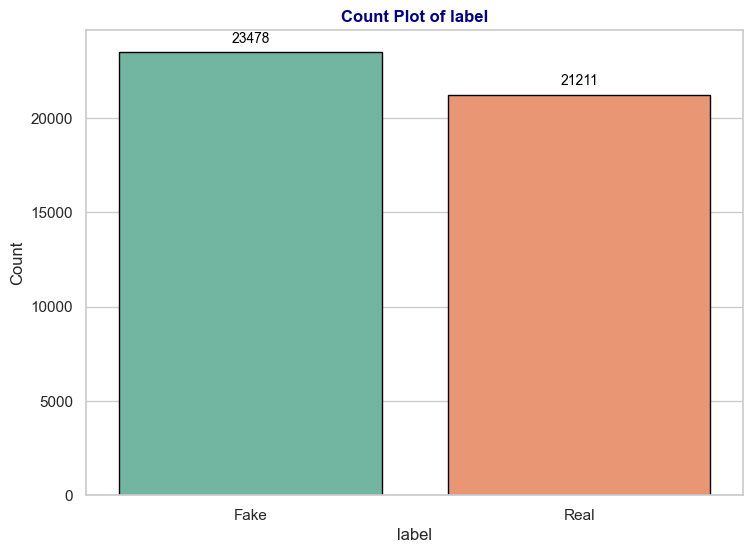

In [19]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(data=df, x='label', palette="Set2", edgecolor="black")
plt.title(f'Count Plot of label', fontweight='bold', color='darkblue')
plt.ylabel("Count", fontsize=12)
for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    xytext=(0, 5), textcoords='offset points', fontsize=10, color='black')
plt.tight_layout(pad=2)
plt.show()

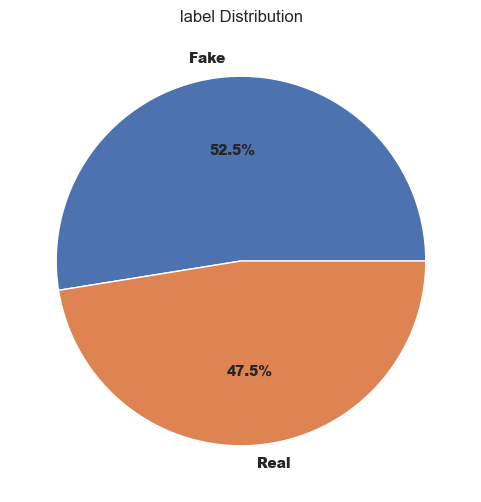

In [20]:
plt.figure(figsize=(6,6))
plt.pie(x =df['label'].value_counts().values , labels=df['label'].value_counts().keys() ,autopct="%1.1f%%" , 
textprops={"fontsize":10,"fontweight":"black"})
plt.title('label Distribution') 
plt.show()

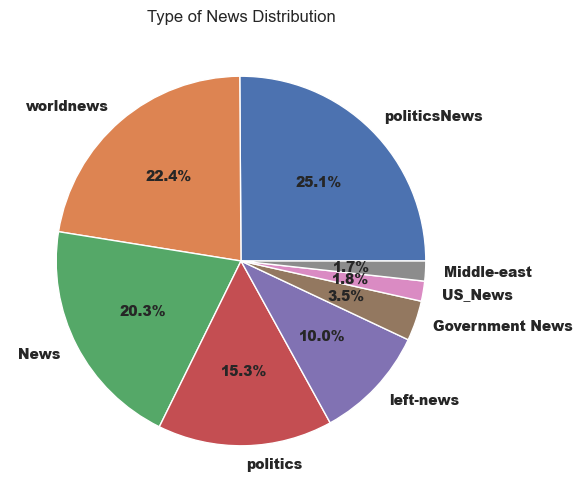

In [21]:
plt.figure(figsize=(6,6))
plt.pie(x =df['subject'].value_counts().values , labels=df['subject'].value_counts().keys() ,autopct="%1.1f%%" , 
textprops={"fontsize":10,"fontweight":"black"})
plt.title('Type of News Distribution') 
plt.show()

In [22]:
pd.crosstab(df['label'] , df['subject']).T.style.background_gradient(subset=['Fake'],cmap='Reds')\
.background_gradient(subset=['Real'] , cmap='Greens')

label,Fake,Real
subject,,
Government News,1570,0
Middle-east,778,0
News,9050,0
US_News,783,0
left-news,4459,0
politics,6838,0
politicsNews,0,11220
worldnews,0,9991


C:\Users\sadan\AppData\Local\Temp\ipykernel_13828\3682882102.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


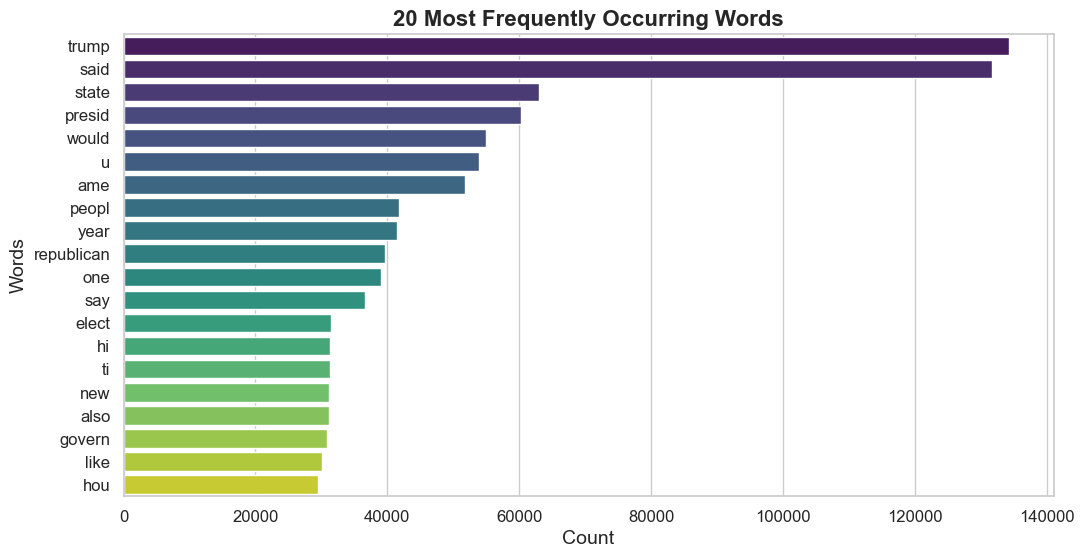

In [23]:
text = " ".join(df["text"])
tokens = text.split()

word_counts = Counter(tokens)
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

# Setup tema seaborn
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.title("20 Most Frequently Occurring Words", fontsize=16, fontweight='bold')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Words", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

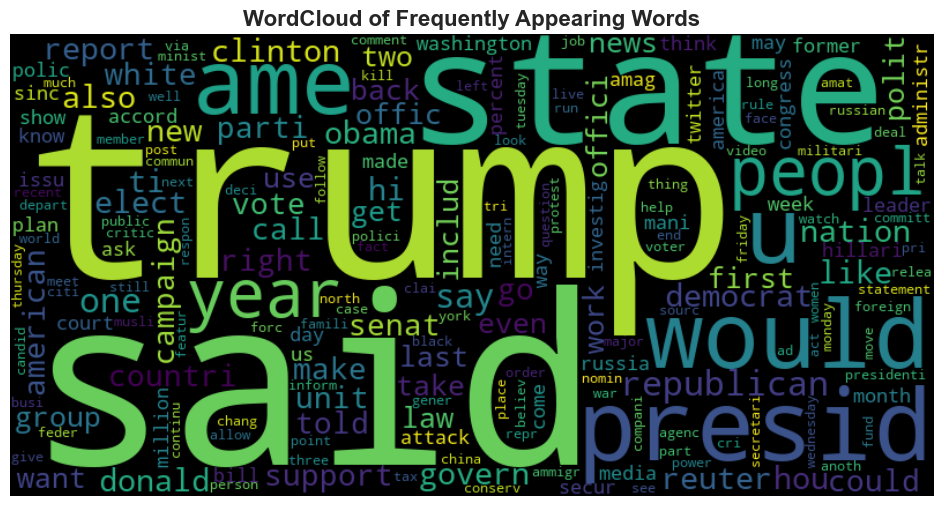

In [24]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='viridis'
).generate_from_frequencies(word_counts)


plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Frequently Appearing Words", fontsize=16, fontweight='bold')
plt.show()

In [44]:
texts = df['text'].values
labels = df['label'].values

In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
for i, atribut in enumerate(label_encoder.classes_):
    print(f'The attribute of "{atribut}" is converted to: {i}')

The attribute of "Fake" is converted to: 0
The attribute of "Real" is converted to: 1


In [46]:
vocab_size = 10000
max_sequence_length = 100

tokenizer = Tokenizer(num_words=vocab_size) 
tokenizer.fit_on_texts(texts) 
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_sequence_length)
y = np.array(encoded_labels)

In [47]:
import pickle
with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)
print("Tokenizer saved.")

Tokenizer saved.


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train Shape: {X_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (35751, 100)
X_test Shape: (8938, 100)
y_train Shape: (35751,)
y_test Shape: (8938,)


In [49]:
from tensorflow.keras.regularizers import l2
model = models.Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, input_length=max_sequence_length),
    layers.LSTM(100,kernel_regularizer=l2(0.01)),
    # layers.Dropout(0.5),  
    # layers.LSTM(64, kernel_regularizer=l2(0.01)),
    # layers.Dropout(0.2),  
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

C:\Users\sadan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [50]:
from tensorflow.keras.utils import plot_model
# Build the model
model.build(input_shape=(None, max_sequence_length))  # Replace max_sequence_length with the actual value
model.summary()

# Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,086,929 (4.15 MB)

 Trainable params: 1,086,929 (4.15 MB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [51]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor="val_loss",       
    patience=3,               
    verbose=1,
    restore_best_weights=True 
)
callbacks = [
    early_stopping_callback
]

In [52]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    verbose=1,
    # validation_split=0.1,
    callbacks=callbacks
)

Epoch 1/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 67s 56ms/step - accuracy: 0.9258 - loss: 0.4042 - val_accuracy: 0.9758 - val_loss: 0.0890
Epoch 2/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 92s 66ms/step - accuracy: 0.9858 - loss: 0.0546 - val_accuracy: 0.9837 - val_loss: 0.0604
Epoch 3/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 73s 65ms/step - accuracy: 0.9937 - loss: 0.0297 - val_accuracy: 0.9834 - val_loss: 0.0638
Epoch 4/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 73s 65ms/step - accuracy: 0.9960 - loss: 0.0202 - val_accuracy: 0.9775 - val_loss: 0.0861
Epoch 5/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 72s 64ms/step - accuracy: 0.9966 - loss: 0.0189 - val_accuracy: 0.9856 - val_loss: 0.0626
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


In [53]:
model.save('fake_news_model.h5')

In [54]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9838 - loss: 0.0568
Test Accuracy: 98.37%


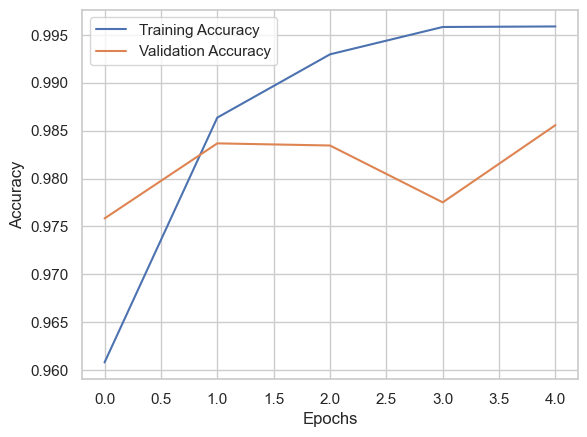

In [55]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


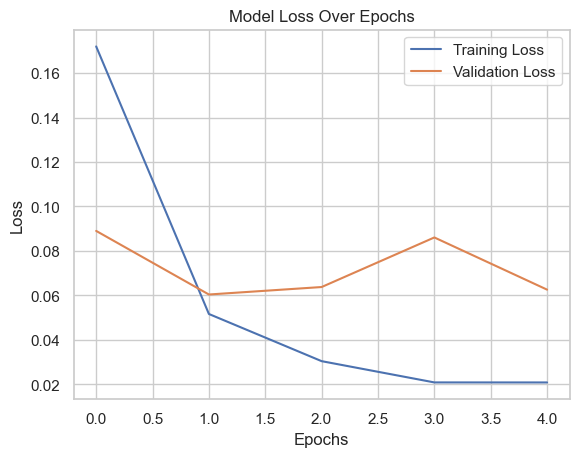

In [56]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()
